<a href="https://colab.research.google.com/github/Khanyecebani/Pytorch-/blob/main/Pytorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [ ]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.14.0.32.55
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread      

In [ ]:
##Tensors

torch_array = torch.randn(3,4)
torch_array
#torch_array.dtype

tensor([[-0.3877, -1.2198,  0.4267,  0.8330],
        [ 0.6282,  0.5049,  0.9497, -1.4225],
        [ 0.3563,  0.6528, -1.4533, -0.3418]])

In [ ]:
#Changing a numpy array to a Tensor

import numpy as np
num_array = np.random.rand(3,4)
tens = torch.tensor(num_array)
tens

tensor([[0.1260, 0.8454, 0.1808, 0.6012],
        [0.0564, 0.3819, 0.7133, 0.1842],
        [0.6923, 0.2289, 0.9275, 0.0910]], dtype=torch.float64)

In [ ]:
#Using Reshape to change the dimensions of an array
my_array = torch.arange(10)
my_array

my_torch = my_array.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
#Grab a specific item
my_torch2 = torch.arange(10)
my_torch2[5]

tensor(5)

In [ ]:
tensor_a = torch.tensor([1,2,3,4])
tensor_b = torch.tensor([5,6,7,8])

In [ ]:
#Addition
tensor_a + tensor_b
torch.add(tensor_a,tensor_b)

tensor([ 6,  8, 10, 12])

In [ ]:
#Subtraction
tensor_b - tensor_a
torch.sub(tensor_b,tensor_a)

tensor([4, 4, 4, 4])

In [ ]:
#Multiplication
tensor_a * tensor_b
torch.mul(tensor_b,tensor_a)


tensor([ 5, 12, 21, 32])

In [ ]:
#Division
tensor_b / tensor_a
torch.div(tensor_b,tensor_a)


tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [ ]:
#Using the modulus operator to find the remainder
tensor_b % tensor_a
torch.remainder(tensor_b,tensor_a)

tensor([0, 0, 1, 0])

In [ ]:
#Exponents or power
torch.pow(tensor_a,tensor_b)


tensor([    1,    64,  2187, 65536])

In [ ]:
#Reassignment
t1 = torch.tensor([3,4,5,6])
t2 = torch.tensor([7,8,9,10])
t1.add_(t2)
t1

tensor([10, 12, 14, 16])

Create a Basic Neural Network Model - Deep Learning with PyTorch 5 using Iris Dataset
****

In [2]:
import torch
import torch.nn as nn   #neural network
import torch.nn.functional as F #it helps move our data forward in the network

Creating a Model Class that inherits nn.Module

In [3]:
class Model(nn.Module):
  ##Input layer(4 features of the flower) -> Hidden layer 1 (H1) -> H2 -> Output layer (3 different classes of the flower)

  def __init__(self, in_features=4, h1=8,h2=9,out_feaures=3):
    super().__init__()
    #we define the model
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_feaures)

    #We then need a function that moves everything forward,ie Input layer -> Hidden layers -> Output layer
  def forward(self,x):
    x = F.relu(self.fc1(x))  #this means take the output, if the output is < 0 then the output is O else it is that value
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [4]:
#Manual seed for randomization
torch.manual_seed(41)
#Creating an instance of the model

model = Model()

Load Data and Train Neural Network Model - Deep Learning with PyTorch 6


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_data_frame = pd.read_csv(url)
my_data_frame

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
my_data_frame["species"] = my_data_frame["species"].replace('setosa',0.0)
my_data_frame["species"] = my_data_frame["species"].replace('versicolor',1.0)
my_data_frame["species"] = my_data_frame["species"].replace('virginica',2.0)
my_data_frame

<ipython-input-7-345bf329a187>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_data_frame["species"] = my_data_frame["species"].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
#Train Test split.Set X,y where X represents the features and y represents the outcome("species")
X = my_data_frame.drop("species",axis=1)
y= my_data_frame['species']

In [9]:
#We have to convert X,y into numpy arrays
X=X.values
y=y.values

#In order to run our train test split,we need sklearn

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41) #20% will be on test and 80% will be on train the model


In [12]:
#We need to convert the X arrays to Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [13]:
#We need to convert the y arrays to Tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [23]:
y_test

tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])

In [14]:
#We need to set the criterion of the model,to measure the error of our predictions from the actual data
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer
#lr = learning rate -> if error doesn't go down after many iterations(epochs) then we need to lower the learning rate
optimizer = torch.optim.Adam(model.parameters(),lr=0.01) #the parameters are self.fc1,self.fc2,self.out


In [15]:
#train the model
#Epochs -> one run through all the training data in our network
epochs = 100 #100 runs through the training data in the network
#as we go through the epochs,we need to note the errors(losses) as we want them to deecrease over time
losses = []   #we'll append the losses here to see if they decrease or not

for i in range(epochs):
  #Go forward and make a prediction for the flower class
  y_pred = model.forward(X_train) #Fet predicted result

  #Measure the error(loss)
  loss = criterion(y_pred,y_train)  #predicted values vs the y_trained values

  #keep track of the losses
  losses.append(loss.detach().numpy())   #change tensor to numpy array

  #print every 10 epoch
  if i % 10 ==0:
    print(f'Epoch: {i} and loss: {loss}')

  #Do some back propagation(as we get an error we feed it back to the network and neurons will tweak it's weights to learn better)
  optimizer.zero_grad() #Clears the old gradient values, ensuring gradients from the previous iterations don’t accumulate.
  loss.backward()  #Performs backpropagation to calculate the new gradients of the loss with respect to each parameter (weights).
  optimizer.step() #Uses the calculated gradients to update the model's parameters, moving them toward values that minimize the loss.

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'Epochs')

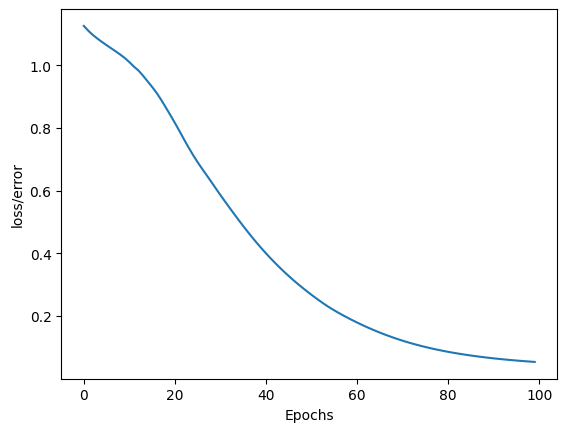

In [16]:
#Graphing out the losses
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epochs")

Evaluate Test Data Set On Network - Deep Learning with PyTorch 7


In [17]:
with torch.no_grad():  #turn off propagation
  y_eval = model.forward(X_test)
  loss= criterion(y_eval,y_test)

In [18]:
loss

tensor(0.1315)

In [22]:
#How the network did on our test vs training data

correct = 0  #we will use this to see how correct our prediction is on the test data
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)

    #statement below will tell us the predicted class for the flower(the highest number is what our network thinks the flower class is)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}  \t {y_val.argmax().item()}')

    #We can check if our predictions are correct or not
    if y_val.argmax().item() == y_test[i]:
      correct+=1
print(f'We got {correct} correct!')
# 0 -> setosa
# 1 -> versicolor
# 2 -> virginica

1.) tensor([-5.8760,  4.4628,  6.5124]) 	 2  	 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 2  	 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 2  	 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 1  	 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 2  	 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 1  	 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 2  	 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 1  	 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 2  	 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 2  	 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 2  	 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 0  	 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 0  	 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 1  	 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 0  	 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 2  	 1
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	 0  	 0
18.) tensor([-5.8075,  4.6053,  6.2458]) 	 1  	 2
19.) tensor([ 4.4343, -2.1392, -2.8242]) 	 0  	 0
20.) tensor([ 3.4528, -1.2514, -2.3660]) 	 0  	 0
21.) tens

Evaluate NEW Data On The Network - Deep Learning with PyTorch 8


In [27]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])
with torch.no_grad():
  print(model(new_iris))
  x = ""
  if new_iris.argmax().item() == 0:
    print(f'Flower is a setosa.')
  elif new_iris.argmax().item() == 1:
    print(f'Flower is a versicolor.')
  else:
    print(f'Flower is a virginica.')

#the prediction of this flower is in index 0(has highest value).Index 0 classifies the flower as setosa


tensor([ 4.5365, -2.2383, -2.8684])
Flower is a setosa.
